In [ ]:
# Aggregation of the tourist flows. Exploratory Analysis

In [1]:
#for google collab
"""
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install geopandas

from google.colab import drive
drive.mount('/content/drive')
"""

"\n!pip install pandas\n!pip install seaborn\n\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [1]:
import pandas as pd
import os
from datetime import datetime

import geopandas as gpd

from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#for google collab
#data_path= os.path.join('/','content', 'drive', 'MyDrive', 'Desarrollo', 'PythonProjects', 'Tourism-mob','data', 'mobility')

#for local environment
data_path= os.path.join('data', 'mobility')

/home/fterroso/python/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Aggregate touristic flows

In [3]:
agg_flow_oh = pd.read_csv(os.path.join(data_path, 'flow_oh_mun.csv'), index_col=0, 
                         dtype={'origen':str, 'destino':str, 'fecha':str})
agg_flow_ho= pd.read_csv(os.path.join(data_path, 'flow_ho_mun.csv'), index_col=0, 
                         dtype={'origen':str, 'destino':str, 'fecha':str})
agg_flow_oo= pd.read_csv(os.path.join(data_path, 'flow_oo_mun.csv'), index_col=0, 
                         dtype={'origen':str, 'destino':str, 'fecha':str})

/home/fterroso/python/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
agg_flow_oh.head()

,fecha,origen,destino,viajes
0,20200401,10037,11004,8.398
1,20200401,10037,28079,8.726
2,20200401,10037,45168,14.373
3,20200401,1059,50297,11.309
4,20200401,11004,11032,15.020


In [5]:
agg_flow_oh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239238 entries, 0 to 2503618
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   fecha    object 
 1   origen   object 
 2   destino  object 
 3   viajes   float64
dtypes: float64(1), object(3)
memory usage: 161.7+ MB


In [6]:
agg_flow_ho.head()

,fecha,origen,destino,viajes
0,20200401,10037,28079,27.708
1,20200401,10037,45168,7.883
2,20200401,1059,14021,3.577
3,20200401,1059,28005,13.490
4,20200401,1059,8124,12.325


In [7]:
agg_flow_ho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4627247 entries, 0 to 2445119
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   fecha    object 
 1   origen   object 
 2   destino  object 
 3   viajes   float64
dtypes: float64(1), object(3)
memory usage: 176.5+ MB


In [8]:
agg_flow_oo.head()

,fecha,origen,destino,viajes
0,20200401,01059,02003,11.494
1,20200401,01059,08019,27.952
2,20200401,01059,08124,8.728
3,20200401,01059,23050,7.969
4,20200401,01059,28005,8.166


In [9]:
agg_flow_oo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12609529 entries, 0 to 6728404
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   fecha    object 
 1   origen   object 
 2   destino  object 
 3   viajes   float64
dtypes: float64(1), object(3)
memory usage: 481.0+ MB


In [10]:
all_flows= pd.concat([agg_flow_oo, agg_flow_oh, agg_flow_ho])

In [11]:
all_flows.head()

,fecha,origen,destino,viajes
0,20200401,01059,02003,11.494
1,20200401,01059,08019,27.952
2,20200401,01059,08124,8.728
3,20200401,01059,23050,7.969
4,20200401,01059,28005,8.166


In [12]:
all_flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21476014 entries, 0 to 2445119
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   fecha    object 
 1   origen   object 
 2   destino  object 
 3   viajes   float64
dtypes: float64(1), object(3)
memory usage: 819.2+ MB


In [13]:
agg_flows= all_flows.groupby('fecha origen destino'.split()).sum()
agg_flows= agg_flows.reset_index()
agg_flows.head()

,fecha,origen,destino,viajes
0,20200401,01001_AM,06060_AM,3.841
1,20200401,01001_AM,09056,10.800
2,20200401,01001_AM,09059,27.477
3,20200401,01001_AM,09194_AM,38.666
4,20200401,01001_AM,09439_AM,10.795


In [14]:
agg_flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382811 entries, 0 to 19382810
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   fecha    object 
 1   origen   object 
 2   destino  object 
 3   viajes   float64
dtypes: float64(1), object(3)
memory usage: 591.5+ MB


In [15]:
agg_flows['fecha'].min(), agg_flows['fecha'].max()

('20200401', '20210430')

In [16]:
agg_flows['timestamp']= agg_flows['fecha'].apply(lambda x: datetime.strptime(x, '%Y%m%d'))

In [17]:
agg_flows = agg_flows.drop(columns='fecha')

In [18]:
agg_flows.head()

,origen,destino,viajes,timestamp
0,01001_AM,06060_AM,3.841,2020-04-01
1,01001_AM,09056,10.800,2020-04-01
2,01001_AM,09059,27.477,2020-04-01
3,01001_AM,09194_AM,38.666,2020-04-01
4,01001_AM,09439_AM,10.795,2020-04-01


In [19]:
agg_flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382811 entries, 0 to 19382810
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   origen     object        
 1   destino    object        
 2   viajes     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 591.5+ MB


In [20]:
agg_flows= agg_flows.reset_index()

In [21]:
agg_flows['origin_dest']= agg_flows.apply(lambda x: '_'.join([x['origen'], x['destino']]), axis=1)

In [22]:
agg_flows.head()

,index,origen,destino,viajes,timestamp,origin_dest
0,0,01001_AM,06060_AM,3.841,2020-04-01,01001_AM_06060_AM
1,1,01001_AM,09056,10.800,2020-04-01,01001_AM_09056
2,2,01001_AM,09059,27.477,2020-04-01,01001_AM_09059
3,3,01001_AM,09194_AM,38.666,2020-04-01,01001_AM_09194_AM
4,4,01001_AM,09439_AM,10.795,2020-04-01,01001_AM_09439_AM


In [23]:
agg_flows.to_csv(os.path.join(data_path,'agg_flows_with_timestamp.csv'))

### Aggregate regular flows

In [35]:
reg_flows = pd.read_csv(os.path.join(data_path, 'reg_flow_mun.csv'), index_col=0, 
                         dtype={'origen':str, 'destino':str, 'fecha':str})

/home/fterroso/python/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [36]:
reg_flows.head()

,fecha,origen,destino,viajes
0,20200401,01059,01059,38955.878
1,20200401,01059,20069,10.147
2,20200401,01059,26089,30.635
3,20200401,01059,31201,19.799
4,20200401,01059,48013,14.038


In [38]:
reg_flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16184430 entries, 0 to 12009581
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   fecha    object 
 1   origen   object 
 2   destino  object 
 3   viajes   float64
dtypes: float64(1), object(3)
memory usage: 617.4+ MB


In [39]:
reg_flows['timestamp']= reg_flows['fecha'].apply(lambda x: datetime.strptime(x, '%Y%m%d'))
reg_flows = reg_flows.drop(columns='fecha')
reg_flows= reg_flows.reset_index()

In [40]:
reg_flows.to_csv(os.path.join(data_path,'reg_flows_with_timestamp.csv'))

## Break point to start from here skiping the above cells

In [68]:
agg_flows= pd.read_csv(os.path.join(data_path,'agg_flows_with.csv'), index_col=0, parse_dates=['timestamp'])
agg_flows = agg_flows.set_index('index')
agg_flows.head()

/home/fterroso/python/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,origen,destino,viajes,timestamp,origin_dest
index,,,,,
0,01001_AM,06060_AM,3.841,2020-04-01,01001_AM_06060_AM
1,01001_AM,09056,10.800,2020-04-01,01001_AM_09056
2,01001_AM,09059,27.477,2020-04-01,01001_AM_09059
3,01001_AM,09194_AM,38.666,2020-04-01,01001_AM_09194_AM
4,01001_AM,09439_AM,10.795,2020-04-01,01001_AM_09439_AM


### Regular flows

In [3]:
reg_flows = pd.read_csv(os.path.join(data_path,'reg_flows_with_timestamp.csv'), 
                        index_col=0,
                       parse_dates=['timestamp'])

/home/fterroso/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/fterroso/python/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
reg_flows.head()

,index,origen,destino,viajes,timestamp
0,0,1059,1059,38955.878,2020-04-01
1,1,1059,20069,10.147,2020-04-01
2,2,1059,26089,30.635,2020-04-01
3,3,1059,31201,19.799,2020-04-01
4,4,1059,48013,14.038,2020-04-01


Check the level of connectivity

In [43]:
num_trips= agg_flows.groupby('origin_dest').size()

In [44]:
num_trips[num_trips > 300].shape

(2968,)

### Generate time series plot  (sheer number of trips)

In [45]:
agg_flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19382811 entries, 0 to 19382810
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   origen       object        
 1   destino      object        
 2   viajes       float64       
 3   timestamp    datetime64[ns]
 4   origin_dest  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 887.3+ MB


In [46]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

## Tourist flows

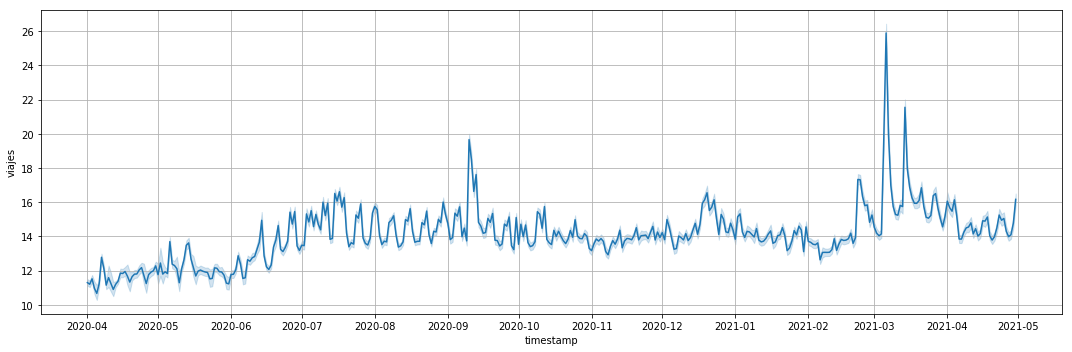

In [47]:
plt.figure(figsize = (15,5))
plt.grid(True)
ax=sns.lineplot(data=agg_flows, x='timestamp', y='viajes');
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.tight_layout();

## Regular flows

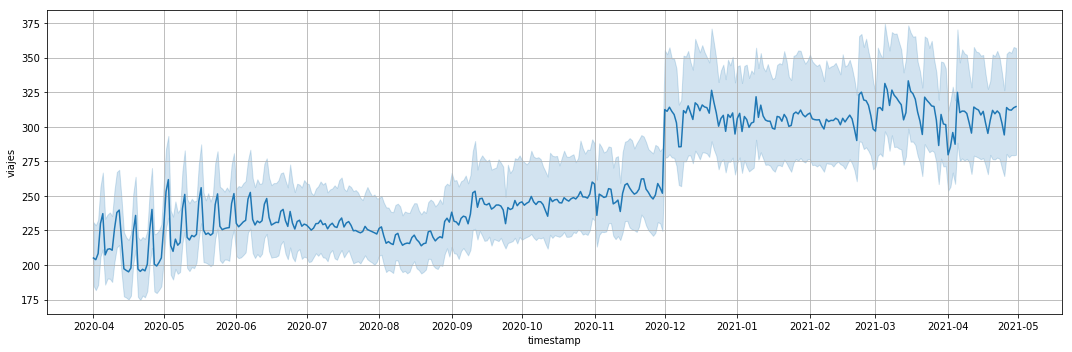

In [48]:
plt.figure(figsize = (15,5))
plt.grid(True)
ax=sns.lineplot(data=reg_flows, x='timestamp', y='viajes');
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.tight_layout();

In [49]:
def plot_decomposition(ts):
    result_ = seasonal_decompose(ts, model='additive', period=7);

    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
    result_.trend.plot(ax=ax1, grid=True, fontsize=20)
    ax1.set_title('Trend',fontdict={'fontsize':20})

    result_.resid.plot(ax=ax2, grid=True, fontsize=20)
    ax2.set_title('Residuals',fontdict={'fontsize':20})

    result_.seasonal.plot(ax=ax3, grid=True, fontsize=20);
    ax3.set_title('Seasonal',fontdict={'fontsize':20})
    ax3.set_xlabel('Day', fontsize=20)

    plt.tight_layout()

#### Tourist flows

In [50]:
agg_flows_ts = agg_flows.groupby('timestamp')['viajes'].sum().to_frame()
agg_flows_ts.head()

,viajes
timestamp,
2020-04-01,288569.873
2020-04-02,295664.717
2020-04-03,264106.541
2020-04-04,102316.297
2020-04-05,84076.134


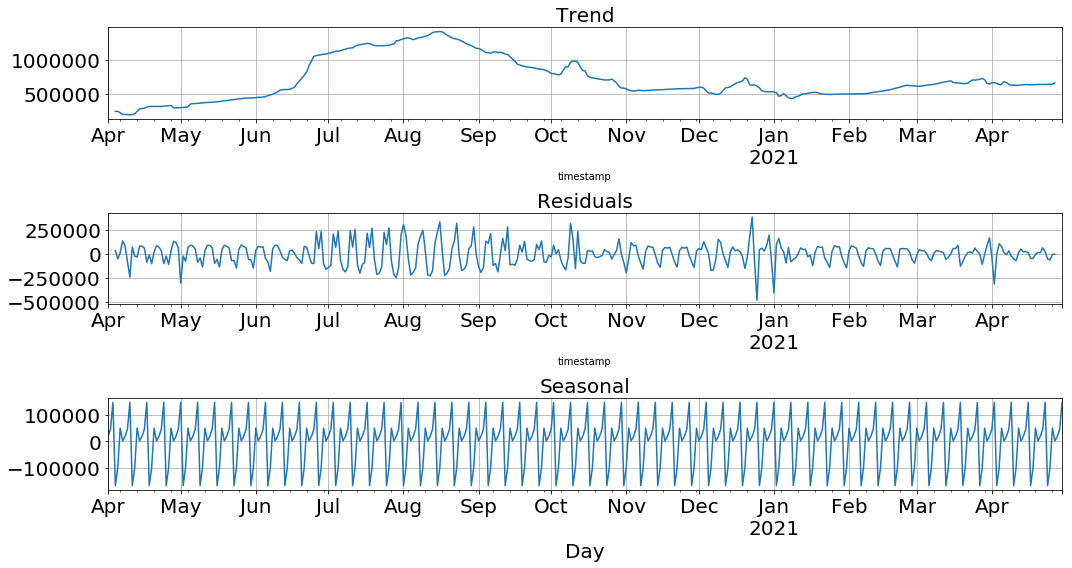

In [51]:
plot_decomposition(agg_flows_ts)

#### Regular flows

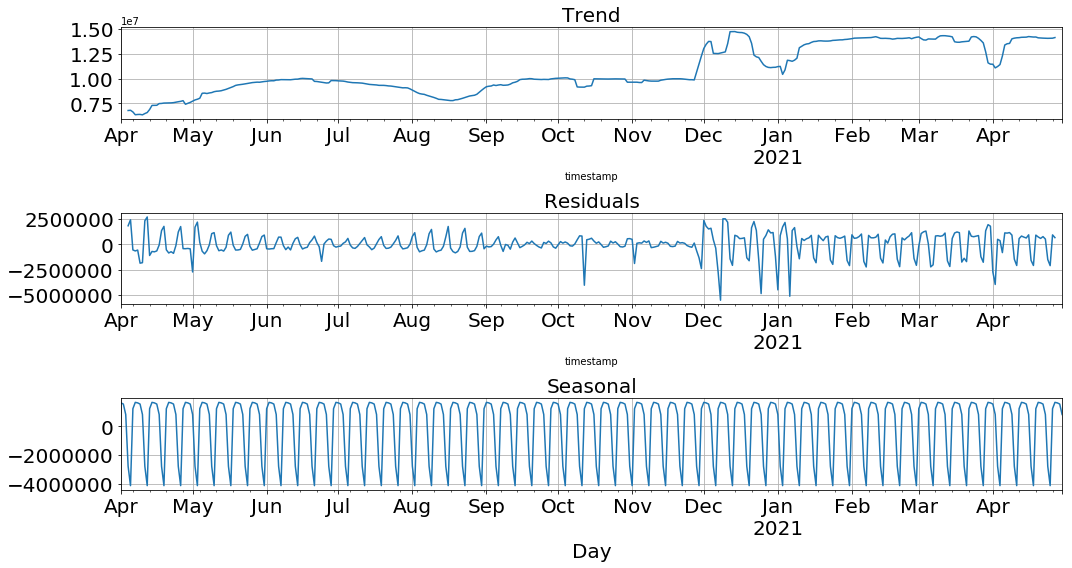

In [52]:
reg_flows_ts = reg_flows.groupby('timestamp')['viajes'].sum().to_frame()
plot_decomposition(reg_flows_ts)

### Plot distribution of the frequency of connections elpmyria

In [27]:
agg_flows.describe()

,viajes
count,1.938281e+07
mean,1.430762e+01
std,3.189155e+01
min,3.550000e-01
25%,6.569000e+00
50%,8.850000e+00
75%,1.412700e+01
max,6.112888e+03


In [9]:
od_tuples_count= agg_flows.groupby(['origen', 'destino']).size()
od_tuples_count = od_tuples_count / 395
od_tuples_count.head()

origen    destino 
01001_AM  02003       0.050633
          02025       0.002532
          02029_AM    0.005063
          02037       0.010127
          02053_AM    0.015190
dtype: float64

In [10]:
od_tuples_count.max()

1.0

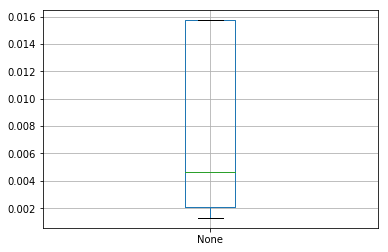

In [22]:
od_tuples_count.value_counts(normalize=True, bins=5).plot(kind='box', showfliers=False, grid=True);

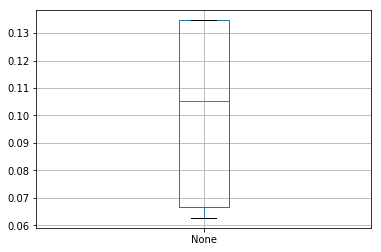

In [26]:
reg_od_tuples_count= reg_flows.groupby(['origen', 'destino']).size()
reg_od_tuples_count = reg_od_tuples_count / 395
reg_od_tuples_count.value_counts(normalize=True, bins=5).plot(kind='box', showfliers=False, grid=True);

In [69]:
agg_flows['viajes_quartile'] = pd.qcut(agg_flows['viajes'], q=5, 
                                           labels=['low', 'low_med', 'med', 'high_med', 'high'])
agg_flows.head()

,origen,destino,viajes,timestamp,origin_dest,viajes_quartile
index,,,,,,
0,01001_AM,06060_AM,3.841,2020-04-01,01001_AM_06060_AM,low
1,01001_AM,09056,10.800,2020-04-01,01001_AM_09056,high_med
2,01001_AM,09059,27.477,2020-04-01,01001_AM_09059,high
3,01001_AM,09194_AM,38.666,2020-04-01,01001_AM_09194_AM,high
4,01001_AM,09439_AM,10.795,2020-04-01,01001_AM_09439_AM,high_med


In [70]:
agg_flows_by_quantile=agg_flows.groupby(['timestamp','viajes_quartile']).size().to_frame()
agg_flows_by_quantile.columns=['num_connections']
agg_flows_by_quantile = agg_flows_by_quantile.reset_index()
agg_flows_by_quantile= agg_flows_by_quantile.pivot('timestamp', 'viajes_quartile', 'num_connections')

In [71]:
agg_flows_by_quantile.head()

viajes_quartile,low,low_med,med,high_med,high
timestamp,,,,,
2020-04-01,6570,4751,5309,5115,3785
2020-04-02,6818,5081,5536,5044,3901
2020-04-03,5323,4275,5095,4704,3520
2020-04-04,2330,1897,2137,1758,1206
2020-04-05,1962,1685,1847,1455,929


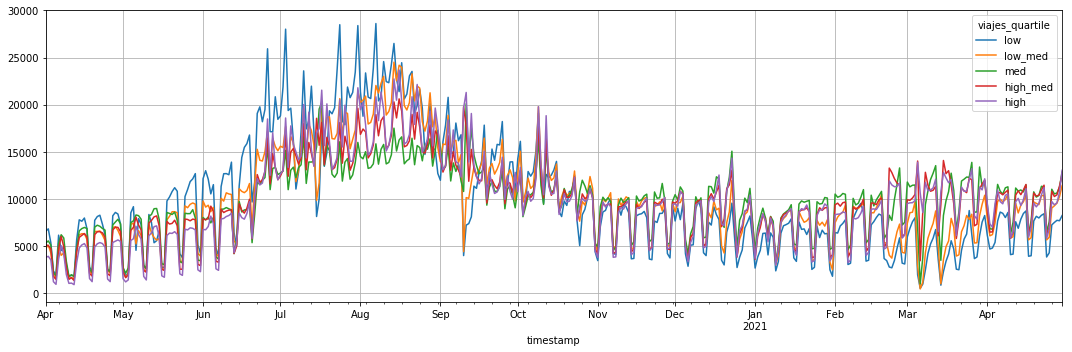

In [72]:
agg_flows_by_quantile.plot(grid=True, figsize=(15,5));
plt.tight_layout()

#### Regular flows

In [73]:
reg_flows['viajes_quartile'] = pd.qcut(reg_flows['viajes'], q=5, 
                                           labels=['low', 'low_med', 'med', 'high_med', 'high'])
reg_flows.head()

,index,origen,destino,viajes,timestamp,viajes_quartile
0,0,1059,1059,38955.878,2020-04-01,high
1,1,1059,20069,10.147,2020-04-01,low_med
2,2,1059,26089,30.635,2020-04-01,med
3,3,1059,31201,19.799,2020-04-01,med
4,4,1059,48013,14.038,2020-04-01,low_med


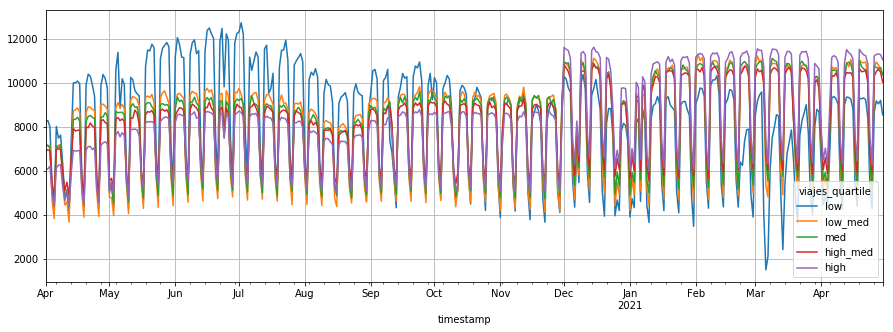

In [74]:
reg_flows_by_quantile=reg_flows.groupby(['timestamp','viajes_quartile']).size().to_frame()
reg_flows_by_quantile.columns=['num_connections']
reg_flows_by_quantile = reg_flows_by_quantile.reset_index()
reg_flows_by_quantile= reg_flows_by_quantile.pivot('timestamp', 'viajes_quartile', 'num_connections')
reg_flows_by_quantile.plot(grid=True, figsize=(15,5));

### Plot timeseries with total number of connections per day

In [53]:
def plot_num_edges_per_day(df):
    n_connections_ts= df.groupby('timestamp').size().to_frame()
    n_connections_ts.columns=['num_connections']
    n_connections_ts.plot(figsize=(15,6), grid=True);
    
    
def plot_num_edges_per_day_decompose(df):
    n_connections_ts= df.groupby('timestamp').size().to_frame()
    n_connections_ts.columns=['num_connections']
    #n_connections_ts.head()
    plot_decomposition(n_connections_ts)

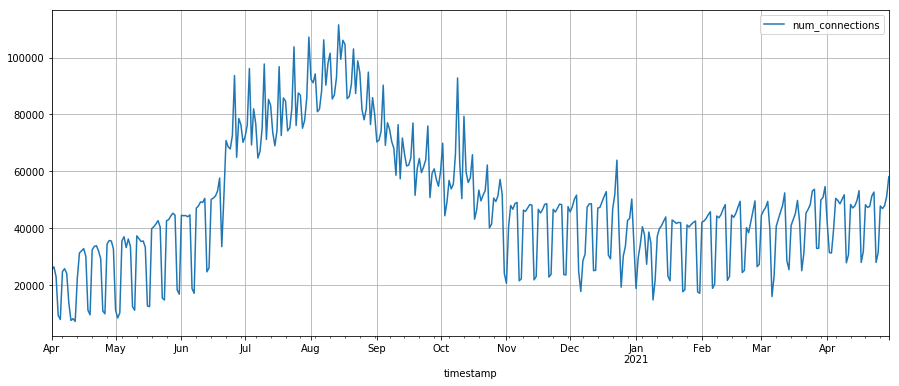

In [54]:
plot_num_edges_per_day(agg_flows)

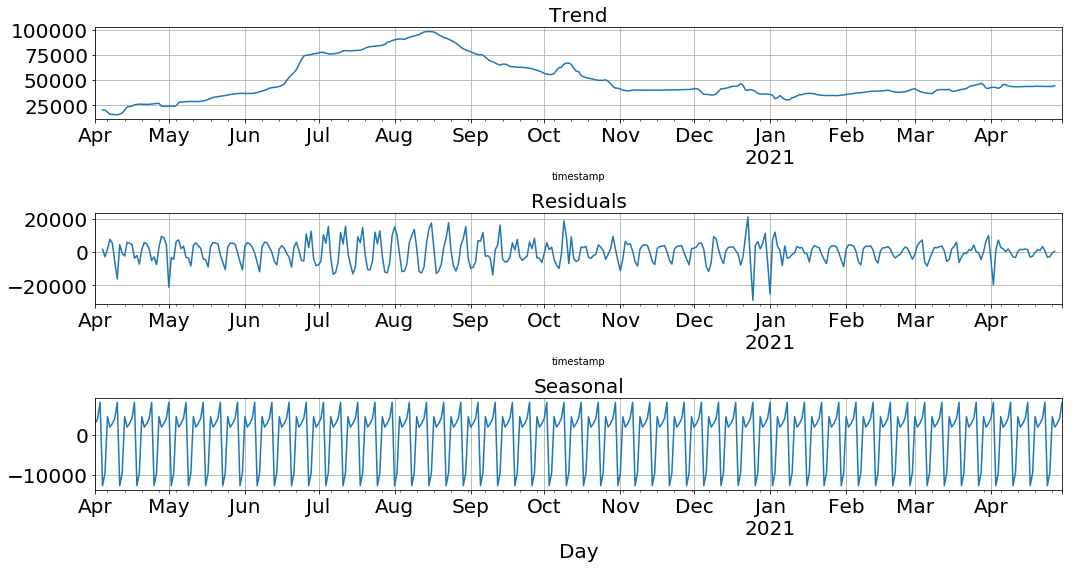

In [55]:
plot_num_edges_per_day_decompose(agg_flows)

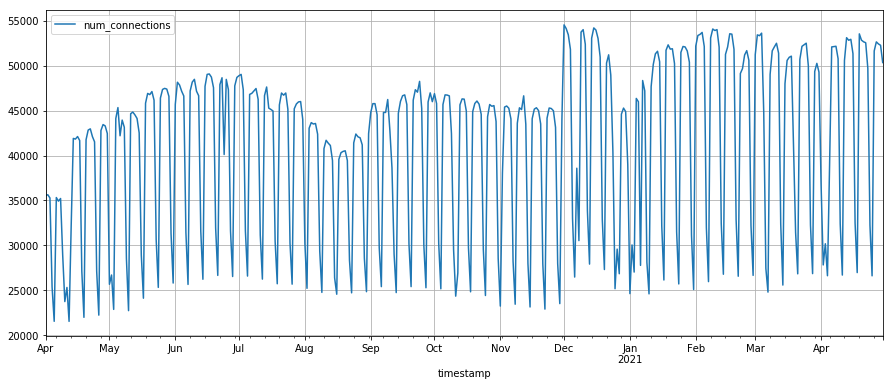

In [56]:
plot_num_edges_per_day(reg_flows)

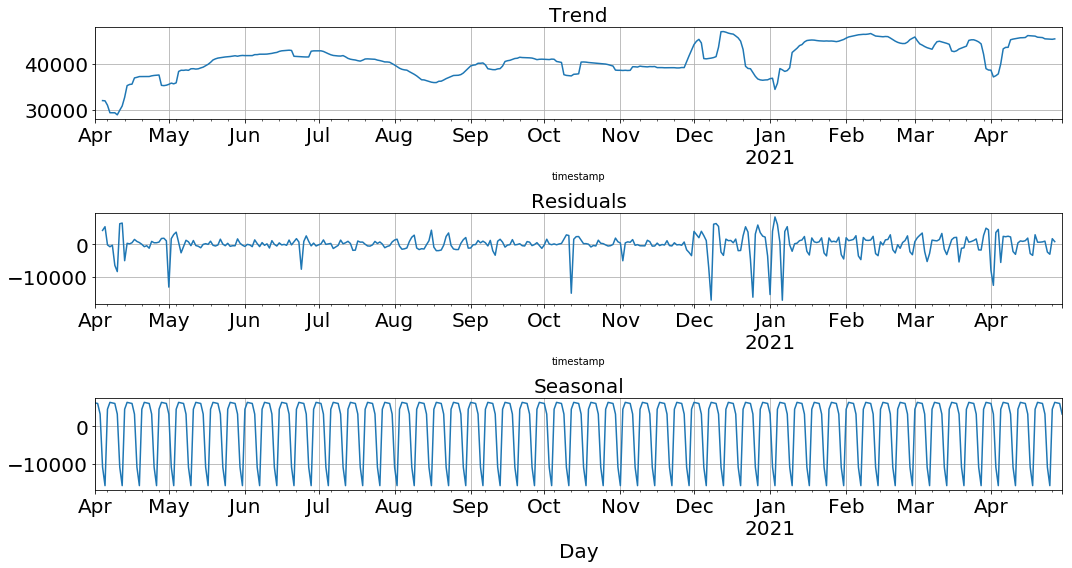

In [57]:
plot_num_edges_per_day_decompose(reg_flows)

### Plot with average number of connections per region

In [76]:
def plot_avg_connections_per_reg(df):
    avg_in_connections_per_reg_ts= df.groupby(['timestamp', 'destino']).size().to_frame()
    avg_in_connections_per_reg_ts= avg_in_connections_per_reg_ts.reset_index()
    avg_in_connections_per_reg_ts = avg_in_connections_per_reg_ts.rename(columns={0:'in_trips'})  
    
    plt.figure(figsize = (15,5))
    plt.grid(True)
    ax=sns.lineplot(data=avg_in_connections_per_reg_ts, x='timestamp', y='in_trips');
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
    plt.tight_layout();

def plot_avg_connections_per_reg_decompose(df):
    avg_in_connections_per_reg_ts= df.groupby(['timestamp', 'destino']).size().to_frame()
    avg_in_connections_per_reg_ts= avg_in_connections_per_reg_ts.reset_index()
    avg_in_connections_per_reg_ts = avg_in_connections_per_reg_ts.rename(columns={0:'in_trips'}) 
    avg_in_connections_ts= avg_in_connections_per_reg_ts.groupby('timestamp').median()

    plot_decomposition(avg_in_connections_ts)

In [58]:
avg_in_connections_per_reg_ts= agg_flows.groupby(['timestamp', 'destino']).size().to_frame()
avg_in_connections_per_reg_ts= avg_in_connections_per_reg_ts.reset_index()
avg_in_connections_per_reg_ts = avg_in_connections_per_reg_ts.rename(columns={0:'in_trips'})
avg_in_connections_per_reg_ts.head()

,timestamp,destino,in_trips
0,2020-04-01,01001_AM,23
1,2020-04-01,01010_AM,2
2,2020-04-01,01031_AM,14
3,2020-04-01,01036,14
4,2020-04-01,01043_AM,5


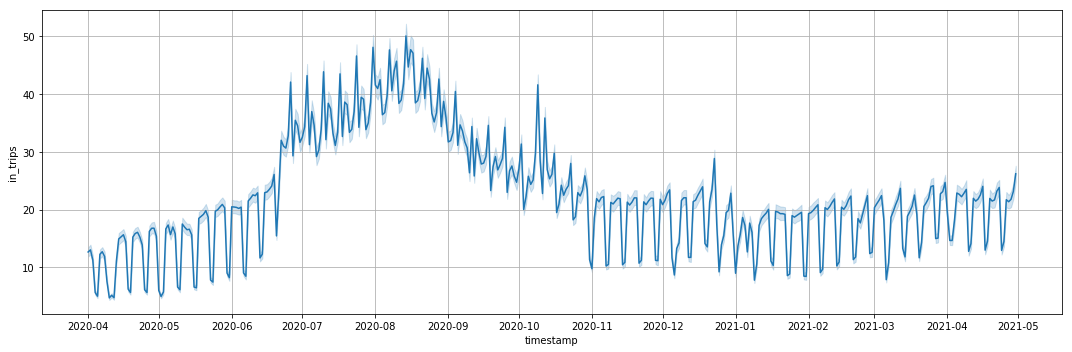

In [59]:
plt.figure(figsize = (15,5))
plt.grid(True)
ax=sns.lineplot(data=avg_in_connections_per_reg_ts, x='timestamp', y='in_trips');
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.tight_layout();

In [60]:
avg_in_connections_ts= avg_in_connections_per_reg_ts.groupby('timestamp').median()
avg_in_connections_ts.head()

,in_trips
timestamp,
2020-04-01,7.0
2020-04-02,7.0
2020-04-03,6.0
2020-04-04,3.0
2020-04-05,3.0


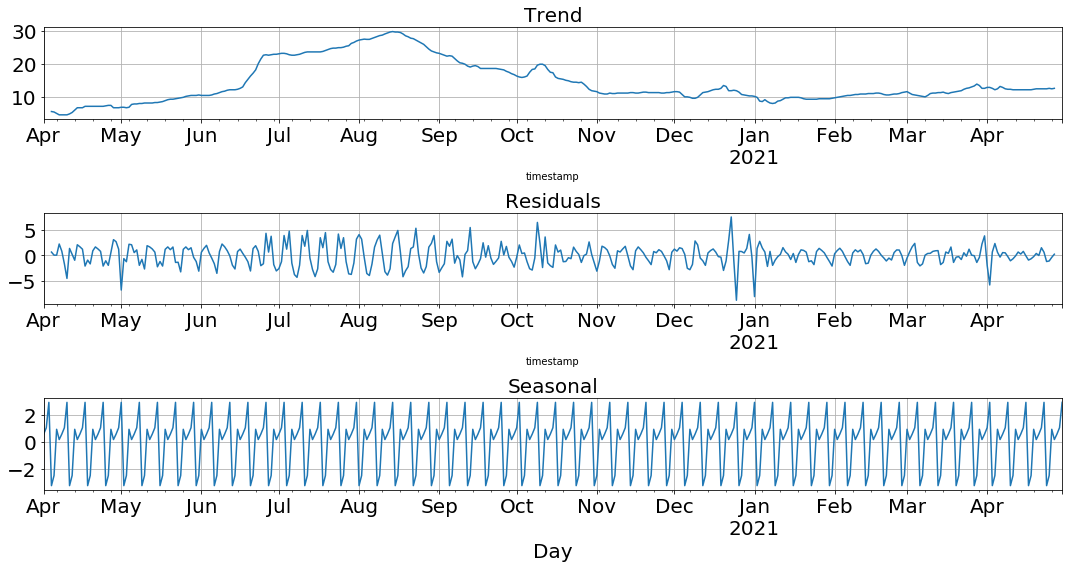

In [61]:
plot_decomposition(avg_in_connections_ts)

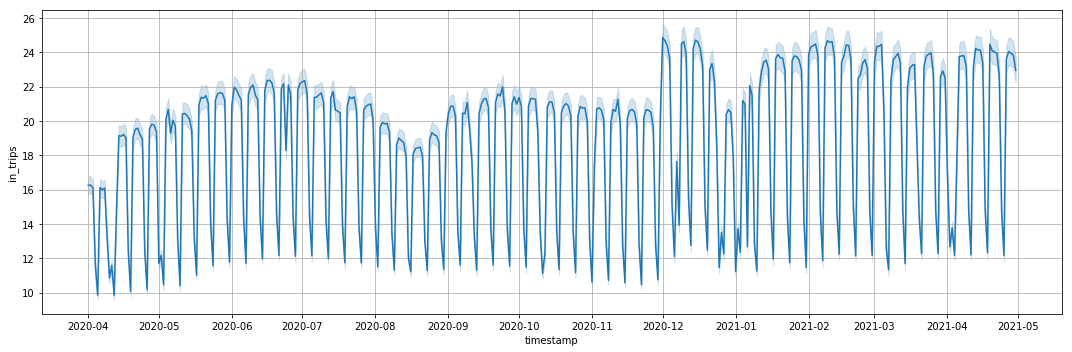

In [77]:
plot_avg_connections_per_reg(reg_flows)

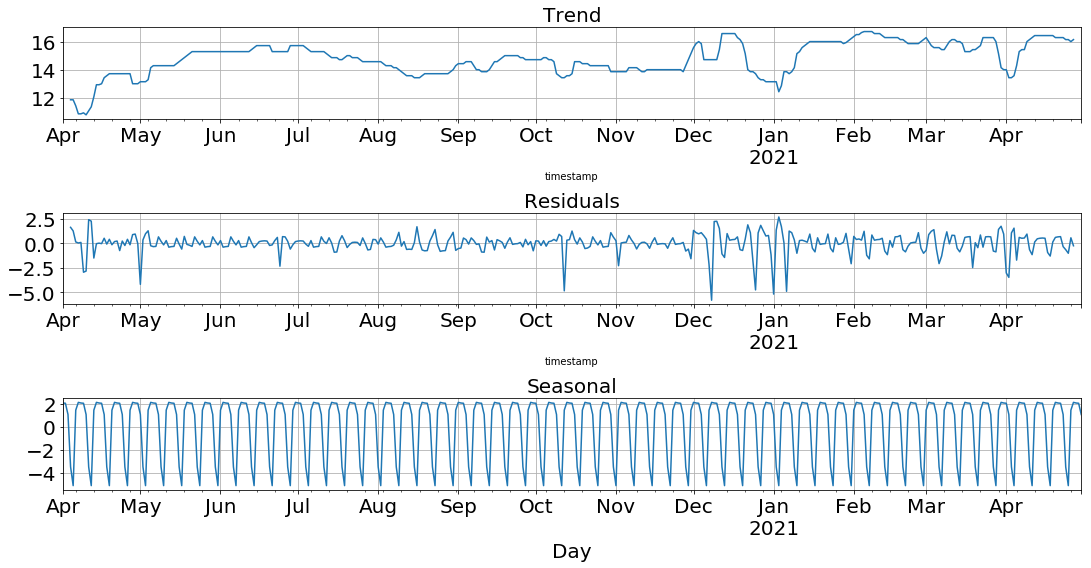

In [78]:
plot_avg_connections_per_reg_decompose(reg_flows)

### Map view with the number of incoming trips

In [62]:
agg_mun_tourist_gdf= gpd.read_file(os.path.join('data','agg_mun_tourist.geojson'),driver='GeoJSON')

In [63]:
mun_tourist_gdf = gpd.read_file(os.path.join('data','mun_tourist.geojson'),driver='GeoJSON')
mun_tourist_gdf.head()

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,hotels-total,hotels-rel,camps-total,camps-rel,POB20,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area,geometry
0,16266,34081616266,33.429,0.0,0.00,Villarejo-Periesteban,0.0,0.000000,0.0,0.0,382,190,192,0.000000,0.000000,0.0,0.000000,0.000000,0.0,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39..."
1,16269,34081616269,70.160,1.0,0.15,Villares,0.0,0.000000,0.0,0.0,414,211,203,0.002415,0.000000,0.0,0.014253,0.000000,0.0,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39..."
2,16270,34081616270,28.256,0.0,0.00,Villarrubio,1.0,0.000066,0.0,0.0,191,107,84,0.000000,0.005236,0.0,0.000000,0.035391,0.0,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39..."
3,16271,34081616271,25.616,0.0,0.00,Villarta,0.0,0.000000,0.0,0.0,843,412,431,0.000000,0.000000,0.0,0.000000,0.000000,0.0,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39..."
4,16272,34081616272,145.106,3.0,0.48,Villas,0.0,0.000000,0.0,0.0,213,122,91,0.014085,0.000000,0.0,0.020675,0.000000,0.0,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40..."


In [64]:
agg_mun_tourist_gdf.head()

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry
0,01001_AM,359.212,17.0,4.0,1.0,7470,3945,3525,0.047326,0.011135,0.002784,"POLYGON ((-2.46644 42.78842, -2.46983 42.78803..."
1,01002,96.348,8.0,1.0,1.0,10264,5044,5220,0.083032,0.010379,0.010379,"MULTIPOLYGON (((-2.97525 42.93816, -2.97702 42..."
2,01010_AM,197.821,17.0,0.0,0.0,5971,3021,2950,0.085936,0.000000,0.000000,"POLYGON ((-3.00076 43.06800, -3.00853 43.06362..."
3,01031_AM,372.013,50.0,18.0,1.0,7428,3851,3577,0.134404,0.048385,0.002688,"MULTIPOLYGON (((-2.48257 42.49991, -2.48180 42..."
4,01036,37.559,5.0,1.0,0.0,18118,8868,9250,0.133124,0.026625,0.000000,"POLYGON ((-2.93850 43.13864, -2.93541 43.13658..."


In [65]:
total_incoming_trips= agg_flows.groupby('destino')['viajes'].count().to_frame().reset_index()
total_incoming_trips.columns=['destino','incoming_trips']
total_incoming_trips.head()

,destino,incoming_trips
0,01001_AM,13985
1,01002,2385
2,01010_AM,1668
3,01031_AM,6248
4,01036,7740


In [66]:
total_outgoing_trips= agg_flows.groupby('origen')['viajes'].count().to_frame().reset_index()
total_outgoing_trips.columns=['origen','outgoing_trips']
total_outgoing_trips.head()

,origen,outgoing_trips
0,01001_AM,14883
1,01002,2522
2,01010_AM,1940
3,01031_AM,5298
4,01036,7337


In [79]:
total_incoming_reg_trips= reg_flows.groupby('destino')['viajes'].count().to_frame().reset_index()
total_incoming_reg_trips.columns=['destino','incoming_reg_trips']
total_outgoing_reg_trips= reg_flows.groupby('origen')['viajes'].count().to_frame().reset_index()
total_outgoing_reg_trips.columns=['origen','outgoing_reg_trips']

In [97]:
agg_mun_tourist_w_flows_gdf= agg_mun_tourist_gdf.merge(total_incoming_trips, left_on='primary_key', right_on='destino')
agg_mun_tourist_w_flows_gdf= agg_mun_tourist_w_flows_gdf.merge(total_outgoing_trips, left_on='primary_key', right_on='origen')

agg_mun_tourist_w_flows_gdf= agg_mun_tourist_w_flows_gdf.merge(total_incoming_reg_trips, left_on='primary_key', right_on='destino')
agg_mun_tourist_w_flows_gdf= agg_mun_tourist_w_flows_gdf.merge(total_outgoing_reg_trips, left_on='primary_key', right_on='origen')

agg_mun_tourist_w_flows_gdf= agg_mun_tourist_w_flows_gdf.drop(columns='destino_x destino_y origen_x origen_y'.split())

In [100]:
agg_mun_tourist_w_flows_gdf['in_tour_trips_rate']= agg_mun_tourist_w_flows_gdf['incoming_trips'] / agg_mun_tourist_w_flows_gdf['incoming_reg_trips']
agg_mun_tourist_w_flows_gdf['out_tour_trips_rate']= agg_mun_tourist_w_flows_gdf['outgoing_trips'] / agg_mun_tourist_w_flows_gdf['outgoing_reg_trips']

In [101]:
agg_mun_tourist_w_flows_gdf.head()

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry,incoming_trips,outgoing_trips,incoming_reg_trips,outgoing_reg_trips,in_tour_trips_rate,out_tour_trips_rate
0,01001_AM,359.212,17.0,4.0,1.0,7470,3945,3525,0.047326,0.011135,0.002784,"POLYGON ((-2.46644 42.78842, -2.46983 42.78803...",13985,14883,4008,4054,3.489271,3.671189
1,01002,96.348,8.0,1.0,1.0,10264,5044,5220,0.083032,0.010379,0.010379,"MULTIPOLYGON (((-2.97525 42.93816, -2.97702 42...",2385,2522,4951,4555,0.481721,0.553677
2,01010_AM,197.821,17.0,0.0,0.0,5971,3021,2950,0.085936,0.000000,0.000000,"POLYGON ((-3.00076 43.06800, -3.00853 43.06362...",1668,1940,4642,4232,0.359328,0.458412
3,01031_AM,372.013,50.0,18.0,1.0,7428,3851,3577,0.134404,0.048385,0.002688,"MULTIPOLYGON (((-2.48257 42.49991, -2.48180 42...",6248,5298,5089,5808,1.227746,0.912190
4,01036,37.559,5.0,1.0,0.0,18118,8868,9250,0.133124,0.026625,0.000000,"POLYGON ((-2.93850 43.13864, -2.93541 43.13658...",7740,7337,8295,8146,0.933092,0.900687


In [86]:
agg_mun_tourist_w_flows_gdf.corr()

,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,incoming_trips,outgoing_trips,incoming_reg_trips,outgoing_reg_trips
area_km2,1.000000,-0.046993,0.202569,0.215408,0.004499,0.004676,0.004340,-0.180310,-0.156995,-0.095387,0.141070,0.114766,-0.285534,-0.266287
Viv-total,-0.046993,1.000000,0.149201,0.242280,0.117594,0.120692,0.114810,0.550371,0.173744,0.173500,0.140725,0.149960,0.041910,0.034003
hotels-total,0.202569,0.149201,1.000000,0.191187,0.825007,0.823422,0.826211,0.008394,0.488339,0.022311,0.636849,0.675451,0.303851,0.306257
camps-total,0.215408,0.242280,0.191187,1.000000,0.033764,0.035065,0.032599,0.108805,0.084640,0.503077,0.111106,0.102825,-0.062131,-0.060172
POB20,0.004499,0.117594,0.825007,0.033764,1.000000,0.999852,0.999883,0.046734,0.325219,0.010301,0.739017,0.804993,0.522301,0.520725
HOMBRES,0.004676,0.120692,0.823422,0.035065,0.999852,1.000000,0.999470,0.047746,0.326719,0.010633,0.741692,0.807073,0.526787,0.525139
MUJERES,0.004340,0.114810,0.826211,0.032599,0.999883,0.999470,1.000000,0.045822,0.323804,0.010004,0.736453,0.802943,0.518182,0.516669
Viv-per-area,-0.180310,0.550371,0.008394,0.108805,0.046734,0.047746,0.045822,1.000000,0.297945,0.332462,0.003163,0.003985,0.134813,0.114438
hotels-per-area,-0.156995,0.173744,0.488339,0.084640,0.325219,0.326719,0.323804,0.297945,1.000000,0.207636,0.245905,0.251451,0.258070,0.246078
camps-per-area,-0.095387,0.173500,0.022311,0.503077,0.010301,0.010633,0.010004,0.332462,0.207636,1.000000,0.000536,0.001564,0.030404,0.020095


In [87]:
mun_tourist_gdf[mun_tourist_gdf['CODIGOINE']=='28079']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,hotels-total,hotels-rel,camps-total,camps-rel,POB20,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area,geometry
472,28079,34132828079,604.98,16.894,1.1,Madrid,519.0,0.034348,0.0,0.0,3334730,1553899,1780831,0.000005,0.000156,0.0,0.027925,0.85788,0.0,"MULTIPOLYGON (((-3.88558 40.57446, -3.88522 40..."


In [88]:
mun_tourist_gdf[mun_tourist_gdf['CODIGOINE']=='50297']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,hotels-total,hotels-rel,camps-total,camps-rel,POB20,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area,geometry
4290,50297,34025050297,973.779,708.0,0.22,Zaragoza,86.0,0.005692,0.0,0.0,681877,326103,355774,0.001038,0.000126,0.0,0.727064,0.088316,0.0,"MULTIPOLYGON (((-1.16484 41.52504, -1.16436 41..."


In [105]:
mun_tourist_gdf[mun_tourist_gdf['Name']=='Benidorm']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,hotels-total,hotels-rel,camps-total,camps-rel,POB20,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area,geometry
3098,03031,34100303031,38.508,2.514,4.33,Benidorm,51.0,0.003375,3.0,0.000199,70450,35214,35236,0.000036,0.000724,0.000043,0.065285,1.3244,0.077906,"MULTIPOLYGON (((-0.12954 38.50112, -0.12962 38..."


In [107]:
agg_mun_tourist_w_flows_gdf[agg_mun_tourist_w_flows_gdf['primary_key']=='03031']

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry,incoming_trips,outgoing_trips,incoming_reg_trips,outgoing_reg_trips,in_tour_trips_rate,out_tour_trips_rate
2146,03031,38.508,2.514,51.0,3.0,70450,35214,35236,0.065285,1.3244,0.077906,"MULTIPOLYGON (((-0.12954 38.50112, -0.12962 38...",18994,17702,9266,10572,2.04986,1.674423


In [112]:
mun_tourist_gdf[mun_tourist_gdf['CODIGOINE']=='38042']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,hotels-total,hotels-rel,camps-total,camps-rel,POB20,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area,geometry
8111,38042,34053838042,24.497,69.0,3.29,"Silos,",0.0,0.0,0.0,0.0,4743,2360,2383,0.014548,0.0,0.0,2.816671,0.0,0.0,"MULTIPOLYGON (((-16.83039 28.39236, -16.83031 ..."


In [108]:
agg_mun_tourist_w_flows_gdf.sort_values(by='in_tour_trips_rate', ascending=False)

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry,incoming_trips,outgoing_trips,incoming_reg_trips,outgoing_reg_trips,in_tour_trips_rate,out_tour_trips_rate
2027,49166_AM,1136.291,75.000,55.0,5.0,5205,2684,2521,0.066004,0.048403,0.004400,"POLYGON ((-6.98353 41.97290, -6.98454 41.97363...",24579,27415,1696,2081,14.492335,13.173955
2108,52001,14.243,43.000,3.0,0.0,87076,44162,42914,3.019027,0.210630,0.000000,"MULTIPOLYGON (((-4.29823 35.17138, -4.29829 35...",6184,9167,438,462,14.118721,19.841991
2038,50034_AM,886.939,25.000,21.0,0.0,4953,2668,2285,0.028187,0.023677,0.000000,"POLYGON ((-1.81647 41.09528, -1.82016 41.09416...",29625,31575,2224,2714,13.320594,11.634119
1050,25243_AM,376.782,307.000,36.0,1.0,8339,4217,4122,0.814795,0.095546,0.002654,"POLYGON ((0.76820 42.60982, 0.76519 42.60987, ...",15103,15077,1315,1416,11.485171,10.647599
545,13077_AM,733.947,3.000,10.0,0.0,7102,3492,3610,0.004087,0.013625,0.000000,"POLYGON ((-3.41678 38.52212, -3.41669 38.51679...",44391,36398,4142,4463,10.717286,8.155501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,38034,20.605,63.000,0.0,0.0,4873,2422,2451,3.057510,0.000000,0.000000,"POLYGON ((-16.62640 28.39024, -16.62621 28.389...",465,173,6614,5643,0.070305,0.030657
225,07043,86.911,104.000,2.0,0.0,5576,2852,2724,1.196626,0.023012,0.000000,"POLYGON ((3.02149 39.46768, 3.01716 39.47110, ...",427,139,6239,5872,0.068440,0.023672
216,07030_AM,65.441,215.000,0.0,0.0,4543,2305,2238,3.285402,0.000000,0.000000,"POLYGON ((3.09726 39.65891, 3.09555 39.65776, ...",330,116,6143,5445,0.053720,0.021304
1420,3501902,394.947,339.003,0.0,0.0,127999,65079,62920,0.858351,0.000000,0.000000,"POLYGON ((-15.45406 27.79845, -15.45683 27.798...",211,91,4129,4202,0.051102,0.021656


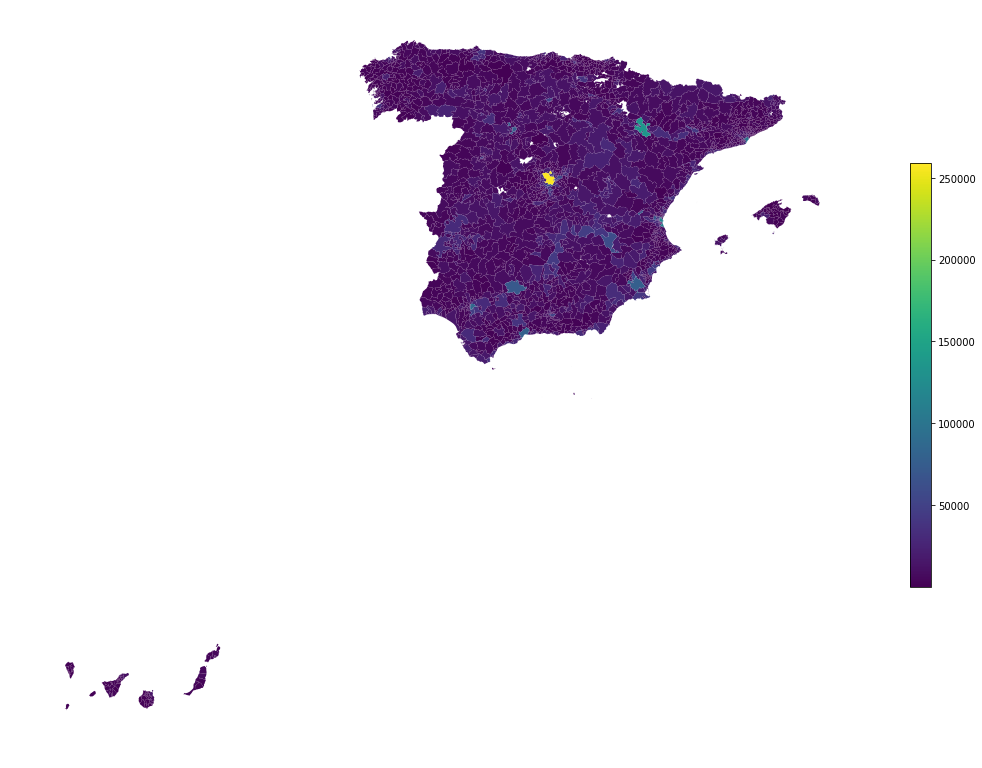

In [74]:
ax=agg_mun_tourist_w_flows_gdf.plot(column='incoming_trips', legend=True, figsize=(15,15),
                                 legend_kwds={'shrink': 0.4})
ax.set_axis_off()
plt.tight_layout()

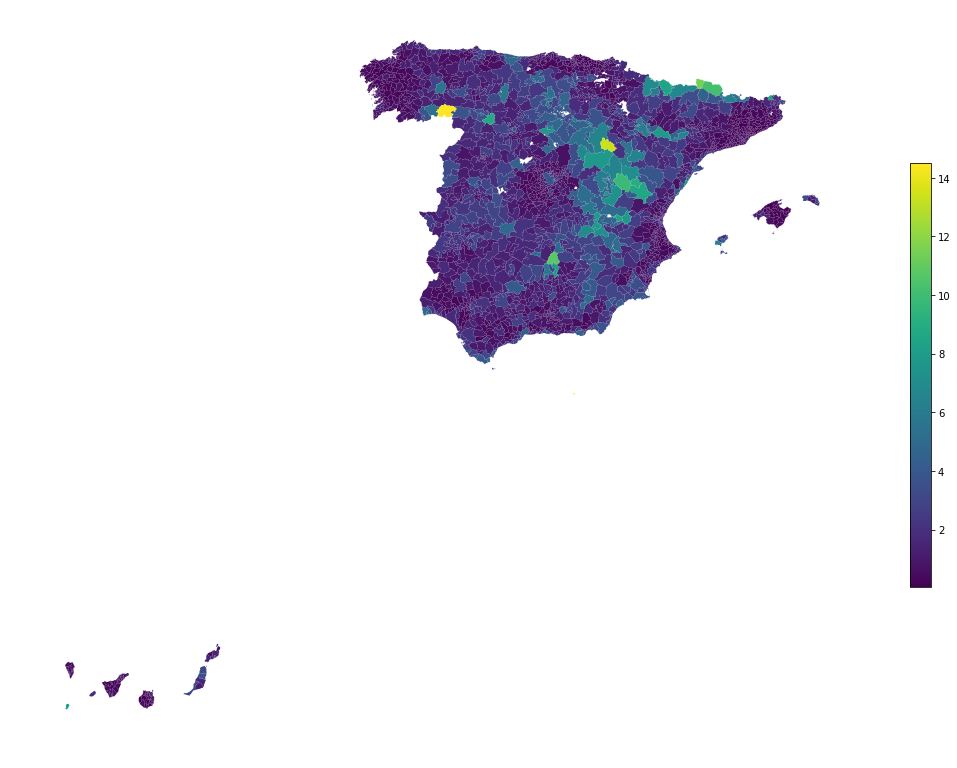

In [102]:
ax=agg_mun_tourist_w_flows_gdf.plot(column='in_tour_trips_rate', legend=True, figsize=(15,15),
                                 legend_kwds={'shrink': 0.4})
ax.set_axis_off()
plt.tight_layout()

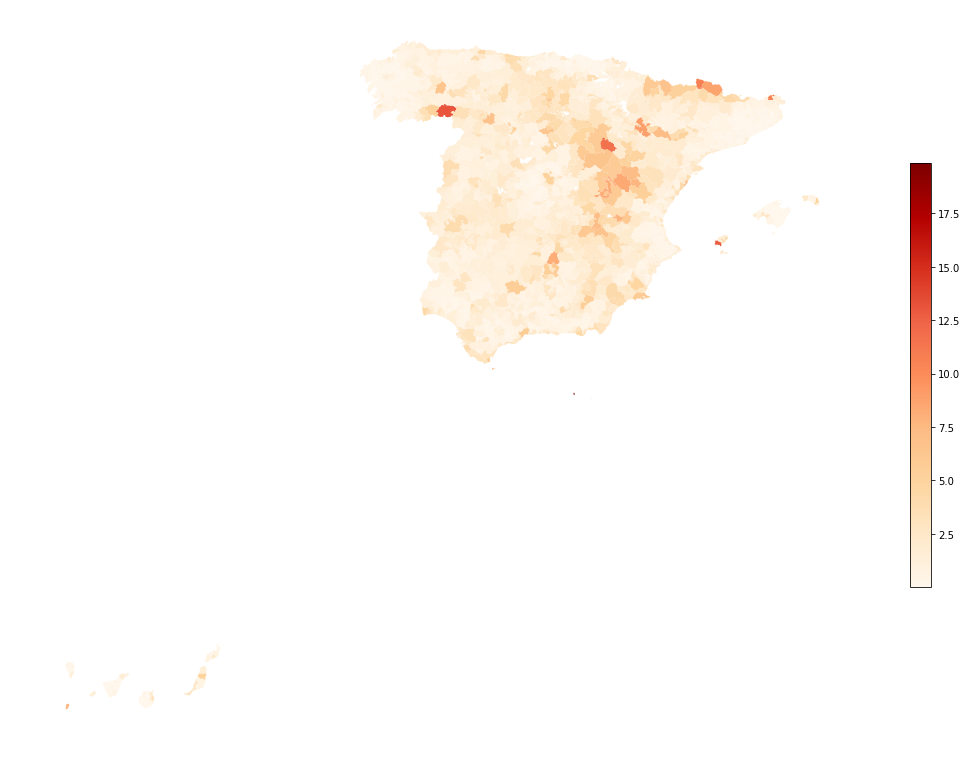

In [104]:
ax=agg_mun_tourist_w_flows_gdf.plot(column='out_tour_trips_rate', legend=True, figsize=(15,15),
                                    cmap='OrRd', legend_kwds={'shrink': 0.4})
ax.set_axis_off()
plt.tight_layout()

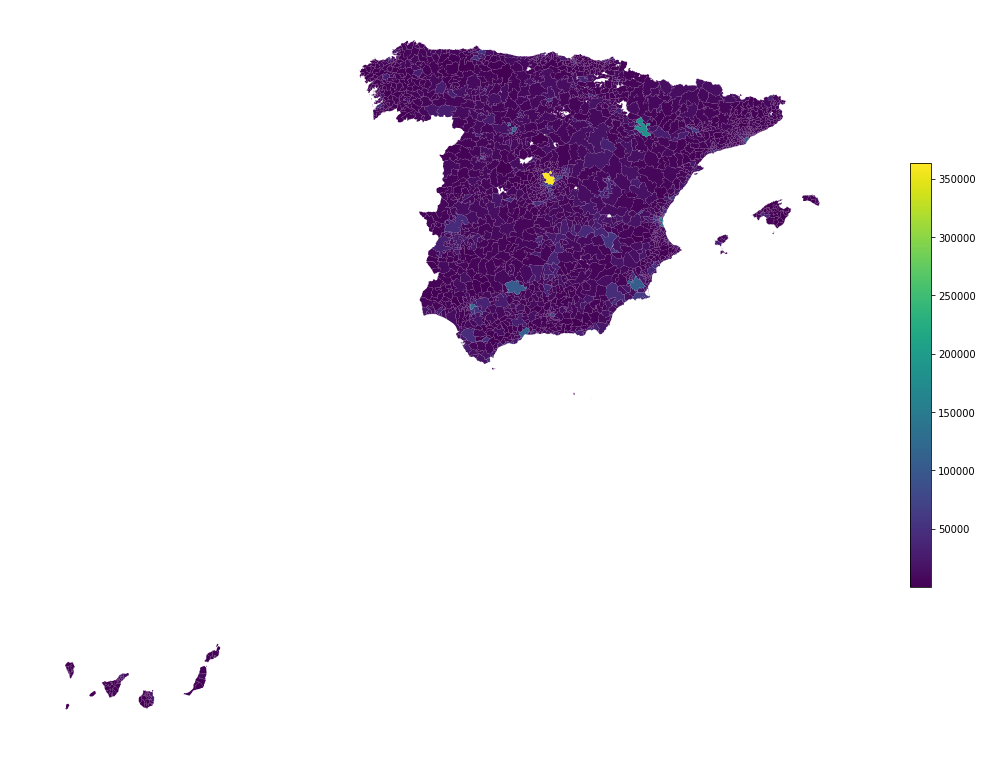

In [75]:
ax=agg_mun_tourist_w_flows_gdf.plot(column='outgoing_trips', legend=True, figsize=(15,15),
                                 legend_kwds={'shrink': 0.4})
ax.set_axis_off()
plt.tight_layout()